# Create a script that can parse the gitdm developer affiliation files and load the data in a SortingHat database using GraphQL.

I obtained the gitdm file from [github.com/cncf/gitdm/developers_affiliations1.txt](https://github.com/cncf/gitdm/blob/master/developers_affiliations1.txt)

In [1]:
f = open("developer.txt","r")
content = f.read()

In [2]:
content[:100]

"# This is the main developers affiliations file.\n# If you see your name with asterisk '*' sign - it "

In [3]:
c = content.replace("\n\t", "\t")

In [4]:
c = c.split("\n")

In [5]:
c = c[7:]

In [6]:
k = [i.split("\t") for i in c]

In [7]:
# remove the comments, lines starting with # hashtag symbol 
#c = c[1:]

In [8]:
for i in k[1111:1122]:
    print("name  ",i[0].split(":")[0])
    print("emails  ",i[0].split(":")[1])
    print("organisations ",i[1:])

name   ESWZY
emails    ESWZY!users.noreply.github.com
organisations  ['DLUT']
name   EWachnowezki
emails    43754445+ewachnowezki!users.noreply.github.com, evgeni.wachnowezki!instana.com
organisations  ['itestra until 2016-12-01', 'Codecentric AG from 2016-12-01 until 2018-09-01', 'Instana from 2018-09-01']
name   EXPErdelfavero
emails    rdelfaverojr!expedia.com
organisations  ['Microsoft Corporation until 2017-01-01', 'Summit Group Solutions from 2017-01-01 until 2019-08-01', 'Expedia Group from 2019-08-01']
name   EamonKeane
emails    EamonKeane!users.noreply.github.com, eamon.keane1!gmail.com
organisations  ['Xpreso']
name   Ecsy
emails    Ecsy!users.noreply.github.com, ecsy.argh+github!gmail.com
organisations  ['IBM until 2018-09-01', 'Banzai Cloud from 2018-09-01']
name   EcutDavid
emails    davidguandev!gmail.com, ecutdavid!users.noreply.github.com
organisations  ['Independent until 2015-05-01', 'Newegg Inc. from 2015-05-01 until 2015-10-01', 'Wiredcraft from 2015-10-01 until 20

In [9]:
import requests
# query = "mutation{ addIdentity(name:"+i[0].split(":")[0]+ ", email:"+ i[0].split(":")[1].split(",")[0]+ ",source:" + "git"+",username:"+ i[0].split(":")[0]+"){uuid}}"

for i in k[1111:1122]:
    url = "http://localhost:8000/graphql/"
    try:
        query = "mutation{ addIdentity(name:"+'"'+str(i[0].split(":")[0])+'"'+", email:"+'"'+ i[0].split(":")[1].split(",")[0]+'"'+ ",source:" +'"'+ "git"+'"'+",username:"+'"'+str(i[0].split(":")[0])+'"'+"){uuid}}"
        print(query)
    except IndexError:
        query = "mutation{ addIdentity(name:"+i[0].split(":")[0]+ ", email:"+"na"+ ",source:" + "git"+",username:"+ i[0].split(":")[0]+"){uuid}}"
    res = requests.post(url, json={'query': query})
    
    if (res.status_code != 200):
        print("error ")
        print(res.text)
        break
    else:
        print(res.text)
    

mutation{ addIdentity(name:"ESWZY", email:" ESWZY!users.noreply.github.com",source:"git",username:"ESWZY"){uuid}}
{"data":{"addIdentity":{"uuid":"233e687054ec56de455dfed0e8e54c2b9bb98214"}}}
mutation{ addIdentity(name:"EWachnowezki", email:" 43754445+ewachnowezki!users.noreply.github.com",source:"git",username:"EWachnowezki"){uuid}}
{"data":{"addIdentity":{"uuid":"db3e0057f4ddbc9ce018eece622ed48735bfde91"}}}
mutation{ addIdentity(name:"EXPErdelfavero", email:" rdelfaverojr!expedia.com",source:"git",username:"EXPErdelfavero"){uuid}}
{"data":{"addIdentity":{"uuid":"7fbfcedec1ce331e9636227c83f25ce931819dcd"}}}
mutation{ addIdentity(name:"EamonKeane", email:" EamonKeane!users.noreply.github.com",source:"git",username:"EamonKeane"){uuid}}
{"data":{"addIdentity":{"uuid":"8cd2446f994da4797bb63ae99c346152b4dc3060"}}}
mutation{ addIdentity(name:"Ecsy", email:" Ecsy!users.noreply.github.com",source:"git",username:"Ecsy"){uuid}}
{"data":{"addIdentity":{"uuid":"3fc0a2624f0b5c95902adcbbfca0bfd68dbc

 currently gives 403 request code, because django security validation. 
 if we include this in urls in django we can successfully exeute url(r'^graphql', csrf_exempt(GraphQLView.as_view(graphiql=True))),
 
 config.urls should look like this
 
```python
from django.contrib import admin
from django.urls import path

from sortinghat.core.views import SortingHatGraphQLView
from django.views.decorators.csrf import csrf_exempt

from .schema import schema

urlpatterns = [
    path('admin/', admin.site.urls),
    path('graphql/', csrf_exempt(SortingHatGraphQLView.as_view(graphiql=True,
                                                   schema=schema))),
]

```


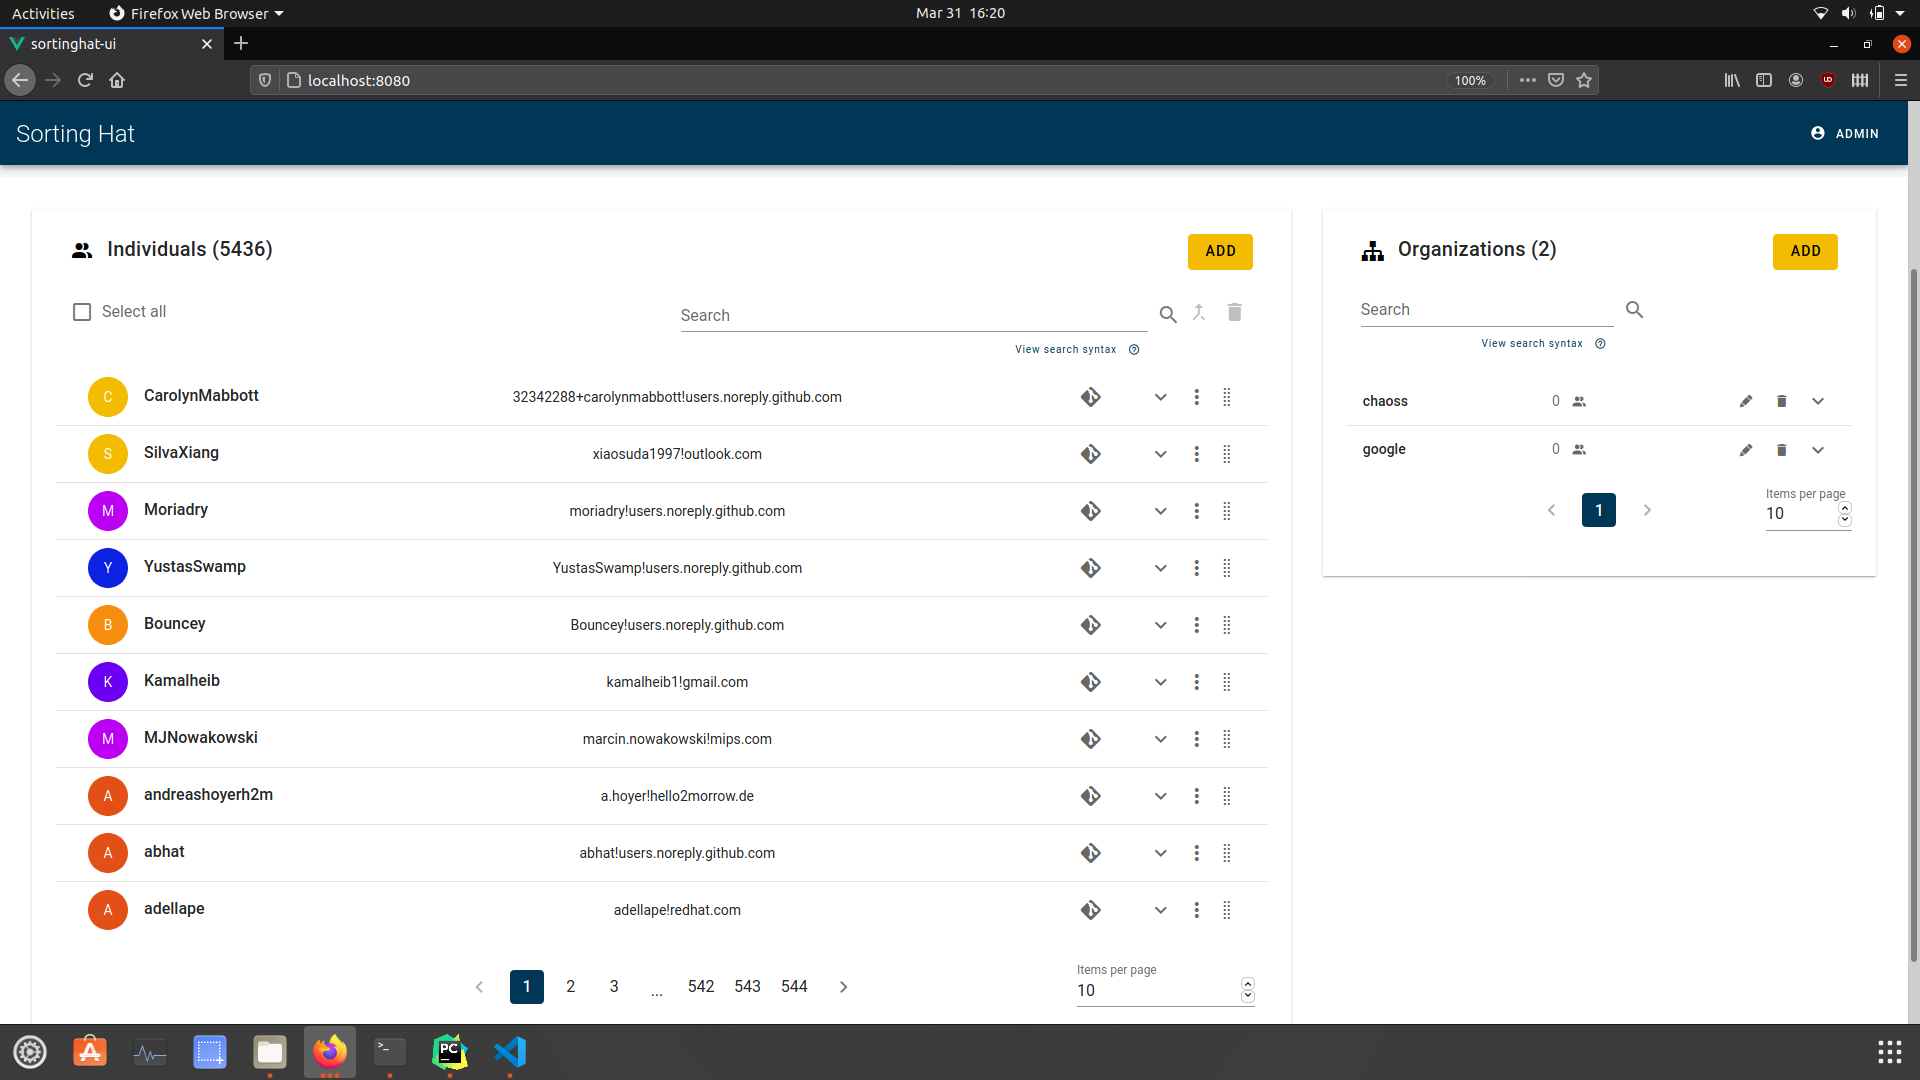